In [4]:
from pathlib import Path
import pandas as pd
import pyvista as pv
import os
from knee_stress_predict.config import raw_data_dir
from knee_stress_predict.objects.KneeGeometry import KneeGeometry

# PATIENTS DATA LOADING

This notebook loads data from set_2. Set_2 was provided by Kalin. Raw data for that set is located in data/raw/set_2. The set consists of 28 patients' data that include knee geometry (7 elements) and a pickle file with tibia contact pressure data.

## Loading knee geometry for each patient



In [5]:
patients_knees = {}
data_set_name = "set_2"
data_dir = Path.joinpath(raw_data_dir, data_set_name)
for i, folder_name in enumerate(os.listdir(data_dir)):
    patient_dir = Path.joinpath(data_dir, folder_name)
    patient_knee = KneeGeometry(patient_dir)
    patients_knees[folder_name] = patient_knee

### Number of points, volume and bound size in each structure

Create a Data Frame that shows _______ for each knee structure for all patients:
- size of the point cloud (number of points)
- volume
- bounds for x
- bounds for y
- bounds for z

Below is the example of a point cloud of Tibia bone for Patient 9905863M00

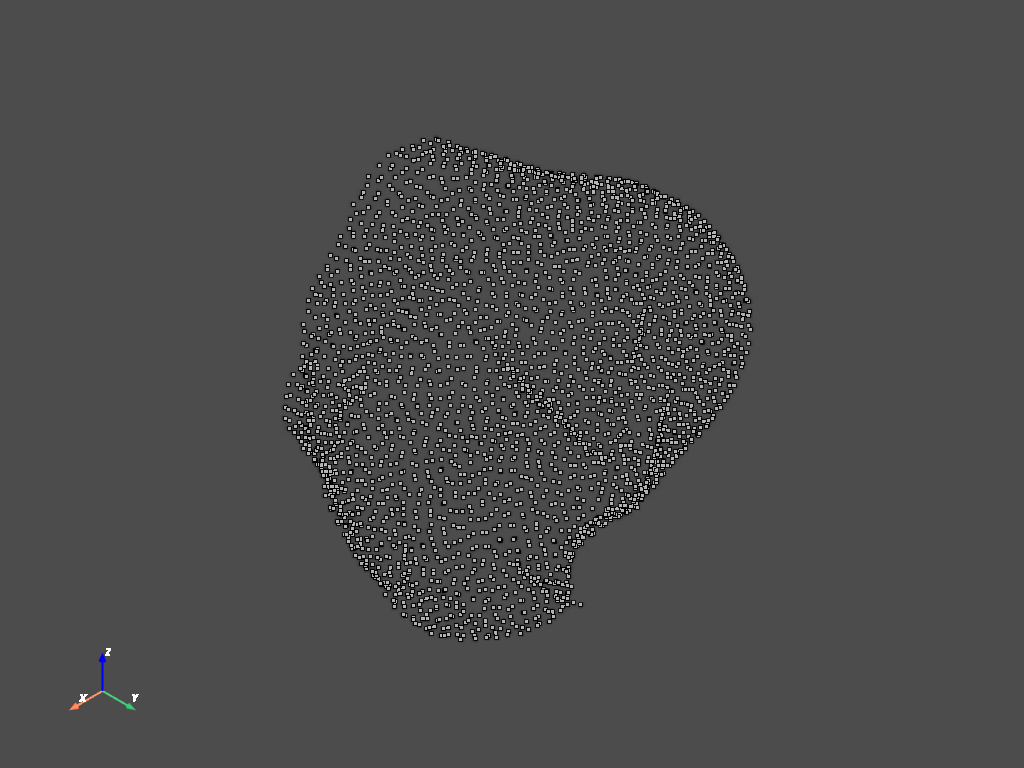

In [10]:
knee = patients_knees["9905863M00"]
tibia_point_cloud = pv.PolyData(knee.tibia.points)
tibia_point_cloud.plot(eye_dome_lighting=True, jupyter_backend="static")

In [13]:
knee_df = pd.DataFrame(columns=['Code',
                                'Patella_PN','Femur_PN','Tibia_PN','Patella_Car_PN',
                                'Femur_Car_PN','Tibia_M_Car_PN', 'Tibia_L_Car_PN'])


for key, value in patients_knees.items():
    df = {'Code': key,
          'Patella_PN': value.patella.n_points,
          'Femur_PN': value.femur.n_points,
          'Tibia_PN': value.tibia.n_points,
          'Patella_Car_PN': value.pat_cart.n_points,
          'Femur_Car_PN': value.fem_cart.n_points,
          'Tibia_M_Car_PN': value.tibia_cart_med.n_points,
          'Tibia_L_Car_PN': value.tibia_cart_lat.n_points,

          'Patella_volume': value.patella.volume,
          'Femur_volume': value.femur.volume,
          'Tibia_volume': value.tibia.volume,
          'Patella_Car_volume': value.pat_cart.volume,
          'Femur_Car_volume': value.fem_cart.volume,
          'Tibia_M_Car_volume': value.tibia_cart_med.volume,
          'Tibia_L_Car_volume': value.tibia_cart_lat.volume,

        # The form of bounds is: (xmin, xmax, ymin, ymax, zmin, zmax).
          'Patella_bounds_x': abs(value.patella.bounds[0] - value.patella.bounds[1]),
          'Femur_bounds_x': abs(value.femur.bounds[0] - value.femur.bounds[1]),
          'Tibia_bounds_x': abs(value.tibia.bounds[0] - value.tibia.bounds[1]),
          'Patella_Car_bounds_x': abs(value.pat_cart.bounds[0] - value.pat_cart.bounds[1]),
          'Femur_Car_bounds_x': abs(value.fem_cart.bounds[0] - value.fem_cart.bounds[1]),
          'Tibia_M_Car_bounds_x': abs(value.tibia_cart_med.bounds[0] - value.tibia_cart_med.bounds[1]),
          'Tibia_L_Car_bounds_x': abs(value.tibia_cart_lat.bounds[0] - value.tibia_cart_lat.bounds[1]),

          'Patella_bounds_y': abs(value.patella.bounds[2] - value.patella.bounds[3]),
          'Femur_bounds_y': abs(value.femur.bounds[2] - value.femur.bounds[3]),
          'Tibia_bounds_y': abs(value.tibia.bounds[2] - value.tibia.bounds[3]),
          'Patella_Car_bounds_y': abs(value.pat_cart.bounds[2] - value.pat_cart.bounds[3]),
          'Femur_Car_bounds_y': abs(value.fem_cart.bounds[2] - value.fem_cart.bounds[3]),
          'Tibia_M_Car_bounds_y': abs(value.tibia_cart_med.bounds[2] - value.tibia_cart_med.bounds[3]),
          'Tibia_L_Car_bounds_y': abs(value.tibia_cart_lat.bounds[2] - value.tibia_cart_lat.bounds[3]),

          'Patella_bounds_z': abs(value.patella.bounds[4] - value.patella.bounds[5]),
          'Femur_bounds_z': abs(value.femur.bounds[4] - value.femur.bounds[5]),
          'Tibia_bounds_z': abs(value.tibia.bounds[4] - value.tibia.bounds[5]),
          'Patella_Car_bounds_z': abs(value.pat_cart.bounds[4] - value.pat_cart.bounds[5]),
          'Femur_Car_bounds_z': abs(value.fem_cart.bounds[4] - value.fem_cart.bounds[5]),
          'Tibia_M_Car_bounds_z': abs(value.tibia_cart_med.bounds[4] - value.tibia_cart_med.bounds[5]),
          'Tibia_L_Car_bounds_z': abs(value.tibia_cart_lat.bounds[4] - value.tibia_cart_lat.bounds[5]),
          }
    knee_df = knee_df.append(df, ignore_index=True)
knee_df

,Code,Patella_PN,Femur_PN,Tibia_PN,Patella_Car_PN,Femur_Car_PN,Tibia_M_Car_PN,Tibia_L_Car_PN,Femur_Car_bounds_x,Femur_Car_bounds_y,...,Tibia_L_Car_bounds_z,Tibia_L_Car_volume,Tibia_M_Car_bounds_x,Tibia_M_Car_bounds_y,Tibia_M_Car_bounds_z,Tibia_M_Car_volume,Tibia_bounds_x,Tibia_bounds_y,Tibia_bounds_z,Tibia_volume
0,9905863M00,923,4011,3009,4745,19095,2840,2840,81.790594,48.066266,...,38.669460,2705.548061,30.589494,9.819381,51.821435,2255.521204,84.724161,63.233628,70.012669,163757.709784
1,9905863M12,884,4110,2790,4585,19025,2840,2840,78.803879,47.016725,...,39.525092,2511.267026,29.651288,7.843438,49.585413,2456.843159,86.480400,58.236134,63.912004,154740.379947
2,9908796M00,641,2861,2268,4120,20295,2840,2840,74.469254,41.613434,...,34.364839,2544.401789,28.152661,9.992703,42.175751,2156.549268,71.530070,70.518826,51.757118,106985.460166
3,9908796M12,625,3022,2171,4715,19385,2840,2840,73.236664,40.589075,...,33.854403,2438.541100,28.210630,8.809906,42.911019,1961.430990,72.717643,65.133588,51.898573,102911.929577
4,9912946M00,788,4137,2689,5575,21035,2840,2840,87.319411,46.886831,...,53.532299,3018.247034,35.758721,15.422482,45.878323,3757.800611,86.467486,57.177342,63.212181,146188.096235
5,9912946M12,791,4298,2533,5685,20945,2840,2840,87.437862,46.988974,...,54.848365,2894.995957,34.061709,13.808537,44.778685,3432.820413,86.317973,50.783500,61.794427,133643.463416
6,9954040M00,803,3417,2512,5015,20230,2840,2350,82.532087,46.811272,...,50.400081,2828.049036,34.892083,14.648708,41.209505,2903.284614,81.918096,61.611692,57.686642,129043.403109
7,9954040M12,812,3233,2740,4885,20345,2840,2360,84.291664,46.083066,...,50.319550,2861.984161,35.242785,14.222025,41.165844,2892.727479,82.258822,72.295499,57.659401,141060.822598
8,9958234M00,759,3696,2606,5235,21865,2840,2840,84.643582,45.918056,...,50.649900,3160.566684,34.166934,12.652546,41.892000,3521.339912,84.322193,59.164859,63.803365,137417.336337
9,9958234M12,752,3674,2669,5225,22195,2840,2840,84.995334,45.714464,...,49.449277,3065.770314,34.794225,12.363443,42.959333,3585.850947,84.865906,60.450300,65.157606,141823.277426


# Distance between femur cartilages and tibia bone